In [1]:
import pandas as pd

# Function to "open" a DataFrame (expand display options)
def open_df():
    """
    Expands the display settings for pandas DataFrames.
    """
    pd.set_option('display.max_rows', None)       # Show all rows
    pd.set_option('display.max_columns', None)    # Show all columns
    pd.set_option('display.max_colwidth', None)   # No limit on column width
    pd.set_option('display.expand_frame_repr', False)  # Don't wrap columns to new line
    print("DataFrame display settings expanded.")

# Function to "close" a DataFrame (collapse display options)
def close_df():
    """
    Resets the display settings for pandas DataFrames to default.
    """
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_colwidth')
    pd.reset_option('display.expand_frame_repr')
    print("DataFrame display settings reset to default.")


In [2]:
# import requests
# from bs4 import BeautifulSoup
# import yfinance as yf
# import pandas as pd
# import time

# # Step 1: Scraping the list of CAD energy stock tickers from the webpage
# def get_stock_tickers(url):
#     # Send a request to the URL
#     response = requests.get(url)
    
#     # Check if the request was successful
#     if response.status_code != 200:
#         raise Exception(f"Failed to load page {url}")
    
#     # Parse the HTML content with BeautifulSoup
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     # Scrape the tickers; you will need to adjust this according to the page structure
#     tickers = []
    
#     # Example: finding tickers in table rows
#     for row in soup.find_all('tr'):  # Adjust this based on actual tag/class in page
#         ticker_column = row.find('td')  # Adjust this selector as per your needs
#         if ticker_column:
#             ticker = ticker_column.get_text(strip=True)
#             ticker = clean_ticker(ticker)
#             tickers.append(ticker)

#     return tickers

# # Clean the ticker to remove unwanted parts
# def clean_ticker(ticker):
#     # Remove unwanted text like 'Opens in a new tab or window'
#     return ticker.split('-TO')[0] + ".TO" if '-TO' in ticker else ticker



# if __name__ == "__main__":
#     # URL for scraping tickers
#     url = "https://www.theglobeandmail.com/investing/markets/stocks/sectors/tsx-energy/"
    
#     # Scrape stock tickers
#     tickers = get_stock_tickers(url)
#     print(f"Scraped tickers: {tickers}")
    

Scraped tickers: ['ACX.TO', 'AAV.TO', 'AOI.TO', 'AKT-A.TO', 'AKT-B.TO', 'ALA.TO', 'ARX.TO', 'ATH.TO', 'BTE.TO', 'BNG.TO', 'BIR.TO', 'BNE.TO', 'BRY.TO', 'CFW.TO', 'CCO.TO', 'CNE.TO', 'CNQ.TO', 'CJ.TO', 'CVE.TO', 'CEU.TO', 'CDR.TO', 'DML.TO', 'ENB.TO', 'EFX.TO', 'EFR.TO', 'ESI.TO', 'E.TO', 'FCU.TO', 'FLNT.TO', 'FRU.TO', 'FEC.TO', 'GXE.TO', 'GEI.TO', 'GTE.TO', 'HWX.TO', 'HWO.TO', 'ITE.TO', 'IMO.TO', 'IPO.TO', 'IPCO.TO', 'ISO.TO', 'JOY.TO', 'KEL.TO', 'KEY.TO', 'KEC.TO', 'KEI.TO', 'LAM.TO', 'MATR.TO', 'MCB.TO', 'MEG.TO', 'MGA.TO', 'NXE.TO', 'NOA.TO', 'NVA.TO', 'SFD.TO', 'OBE.TO', 'OVV.TO', 'POU.TO', 'PXT.TO', 'PKI.TO', 'PSI.TO', 'PPL.TO', 'PMT.TO', 'TAL.TO', 'PRQ.TO', 'PEY.TO', 'PHX.TO', 'PEA.TO', 'PNE.TO', 'PPR.TO', 'PSK.TO', 'PD.TO', 'PSD.TO', 'QEC.TO', 'RBY.TO', 'SOIL.TO', 'SHLE.TO', 'SDE.TO', 'U-U.TO', 'U-UN.TO', 'STEP.TO', 'SCR.TO', 'SU.TO', 'SGY.TO', 'TVE.TO', 'TRP.TO', 'TNZ.TO', 'TVK.TO', 'TWM.TO', 'TPZ.TO', 'TOT.TO', 'TXP.TO', 'TOU.TO', 'TCW.TO', 'URE.TO', 'URC.TO', 'VLE.TO', 'VRN.T

In [3]:
# tickers = [ticker.replace('.TO','') for ticker in tickers]
# tickers.remove("NVA")

In [ ]:
import requests
import pandas as pd

# analyst_url = "https://production.dataviz.cnn.io/quote/analystratings/SU"
# forecast_url = "https://production.dataviz.cnn.io/quote/forecast/SU"

# List of tickers

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Function to scrape forecast data for a given ticker
def get_forecast_data(ticker):
    forecast_url = f"https://production.dataviz.cnn.io/quote/forecast/{ticker}"
    response = requests.get(forecast_url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data, index=[0])  # Return as DataFrame with single row
    else:
        print(f"Failed to fetch forecast data for {ticker}")
        return None

# Function to scrape analyst data for a given ticker
def get_analyst_data(ticker):
    analyst_url = f"https://production.dataviz.cnn.io/quote/analystratings/{ticker}"
    response = requests.get(analyst_url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data, index=[0])  # Return as DataFrame with single row
    else:
        print(f"Failed to fetch analyst data for {ticker}")
        return None

# Main function to run the script and concatenate data
def scrape_and_concatenate_data(tickers):
    all_data = []  # List to hold all the DataFrames
    
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        time.sleep(1)
        # Get forecast data
        df_forecast = get_forecast_data(ticker)
        
        # Get analyst data
        df_analyst = get_analyst_data(ticker)
        
        # If both DataFrames are not None, merge them
        if df_forecast is not None and df_analyst is not None:
            # Merge on 'symbol' column
            merged_df = pd.merge(df_forecast, df_analyst, on='symbol', how='inner')
            all_data.append(merged_df)  # Append the merged DataFrame to the list
    
    # Concatenate all DataFrames into one large DataFrame
    if all_data:
        final_df = pd.concat(all_data, ignore_index=True)
        return final_df
    else:
        print("No data fetched.")
        return None

# Run the scraper and concatenate all data into one DataFrame
if __name__ == "__main__":
    final_df = scrape_and_concatenate_data(tickers)
    
    if final_df is not None:
        print("Final concatenated DataFrame:")
        final_df

In [ ]:
import requests
import pandas as pd
import time

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept": "application/json"
}

# Function to scrape forecast data for a given ticker
def get_forecast_data(ticker):
    forecast_url = f"https://production.dataviz.cnn.io/quote/forecast/{ticker}"
    response = requests.get(forecast_url, headers=headers, timeout=10)
    
    # Accept both 200 and 202 status codes
    if response.status_code in [200, 202]:
        data = response.json()
        return pd.DataFrame(data, index=[0])  # Return as DataFrame with single row
    else:
        print(f"Failed to fetch forecast data for {ticker}. Status code: {response.status_code}")
        print(f"Response content: {response.text}")
        return None

# Function to scrape analyst data for a given ticker
def get_analyst_data(ticker):
    analyst_url = f"https://production.dataviz.cnn.io/quote/analystratings/{ticker}"
    response = requests.get(analyst_url, headers=headers, timeout=10)
    
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data, index=[0])  # Return as DataFrame with single row
    else:
        print(f"Failed to fetch analyst data for {ticker}. Status code: {response.status_code}")
        return None

# Main function to run the script and concatenate data
def scrape_and_concatenate_data(tickers):
    all_data = []  # List to hold all the DataFrames
    
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        time.sleep(1)  # Add delay between requests
        
        # Fetch forecast data
        df_forecast = get_forecast_data(ticker)
        
        # Fetch analyst data
        df_analyst = get_analyst_data(ticker)
        
        # Merge forecast and analyst data (if both are available)
        if df_forecast is not None and df_analyst is not None:
            merged_df = pd.merge(df_forecast, df_analyst, on='symbol', how='inner')
            all_data.append(merged_df)  # Append merged DataFrame
    
    # Concatenate all the data if available
    if all_data:
        final_df = pd.concat(all_data, ignore_index=True)
        return final_df
    else:
        print("No data fetched.")
        return None

# List of tickers
tickers = ["AR", "NFG", "RRC", "CNX", "EQT"]

# Run the scraper and concatenate all data into one DataFrame
if __name__ == "__main__":
    final_df = scrape_and_concatenate_data(tickers)
    
    if final_df is not None:
        print("Final concatenated DataFrame:")
        print(final_df)


In [176]:
final_df

,symbol,current_stock_price,high_target_price,median_target_price,low_target_price,percent_high_price,percent_median_price,percent_low_price,last_updated_x,num_of_analysts,num_of_buys,percent_buys,num_of_holds,percent_holds,num_of_sells,percent_sells,last_updated_y
0,AR,28.61,44.0,34.0,25.0,53.792380,18.839567,-12.617966,2024-10-05T08:09:46.565272+00:00,25,13,52.0000,11,44.0000,1,4.0000,2024-10-09T08:10:23.052125+00:00
1,NFG,59.21,81.0,65.0,64.0,36.801216,9.778754,8.089850,2024-09-28T08:22:38.666442+00:00,5,2,40.0000,3,60.0000,0,0.0000,2024-10-09T08:10:09.411498+00:00
2,RRC,30.78,45.0,35.0,27.0,46.198830,13.710201,-12.280702,2024-10-09T08:04:34.166559+00:00,28,8,28.5715,16,57.1429,4,14.2857,2024-10-09T08:10:58.928246+00:00
3,CNX,34.21,38.0,27.0,20.0,11.078632,-21.075709,-41.537562,2024-10-08T08:21:06.077567+00:00,12,2,16.6666,6,50.0000,4,33.3333,2024-10-09T08:11:55.911041+00:00
4,EQT,36.55,55.0,41.0,32.0,50.478796,12.175103,-12.448700,2024-10-07T08:21:49.171959+00:00,25,15,60.0000,10,40.0000,0,0.0000,2024-10-09T08:11:00.692163+00:00


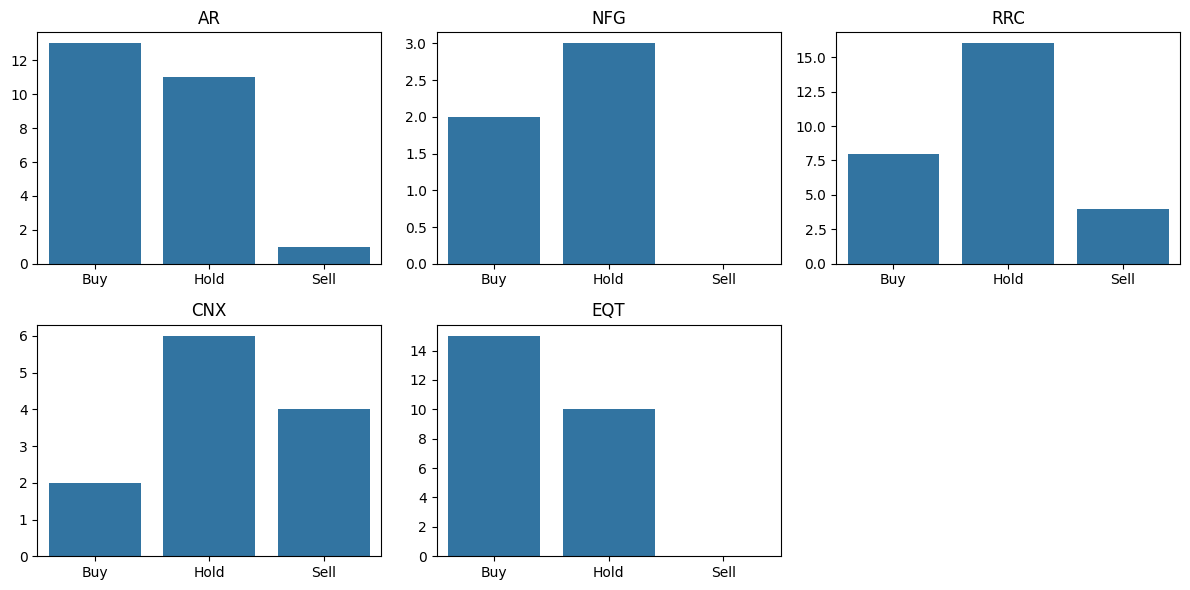

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
df= final_df.copy()
# Assuming your DataFrame is named df and contains 'symbol', 'num_of_buys', 'num_of_holds', and 'num_of_sells'

# We will focus on 'num_of_buys', 'num_of_holds', 'num_of_sells' for each 'symbol'
# Get the unique stock symbols
unique_symbols = df['symbol'].unique()

# Create subplots based on the number of unique symbols
fig, axes = plt.subplots(len(unique_symbols) // 3 + 1, 3, figsize=(12, 6))
axes = axes.flatten()

# Loop through each symbol and create the histograms
for i, symbol in enumerate(unique_symbols):
    # Filter the data for the specific stock symbol
    stock_data = df[df['symbol'] == symbol]

    # Prepare the data to plot
    categories = ['Buy', 'Hold', 'Sell']
    values = [stock_data['num_of_buys'].values[0], stock_data['num_of_holds'].values[0], stock_data['num_of_sells'].values[0]]
    
    # Create the plot on the respective axis
    sns.barplot(x=categories, y=values, ax=axes[i])
    axes[i].set_title(symbol)
    
# Hide any unused axes
for ax in axes[len(unique_symbols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [179]:
percent_buys = final_df.sort_values(by = "percent_buys",ascending = False)
percent_buys["high/low"] = percent_buys["high_target_price"] / percent_buys["low_target_price"]
percent_buys = percent_buys[["symbol","current_stock_price","percent_buys","num_of_analysts","high_target_price","median_target_price","low_target_price","percent_median_price","high/low"]]
percent_buys.reset_index().drop(columns = ["index"])
percent_buys.sort_values(by = ["high/low"],ascending = False)

,symbol,current_stock_price,percent_buys,num_of_analysts,high_target_price,median_target_price,low_target_price,percent_median_price,high/low
3,CNX,34.21,16.6666,12,38.0,27.0,20.0,-21.075709,1.900000
0,AR,28.61,52.0000,25,44.0,34.0,25.0,18.839567,1.760000
4,EQT,36.55,60.0000,25,55.0,41.0,32.0,12.175103,1.718750
2,RRC,30.78,28.5715,28,45.0,35.0,27.0,13.710201,1.666667
1,NFG,59.21,40.0000,5,81.0,65.0,64.0,9.778754,1.265625


Processing NXE.TO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing PHX.TO...
Processing CVE.TO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing MCB.TO...
Processing MEG.TO...
Processing VRN.TO...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing TAL.TO...
Processing NOA.TO...
Processing ESI.TO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing EFX.TO...
Processing BTE.TO...



[*********************100%***********************]  1 of 1 completed


Processing OVV.TO...
Processing OBE.TO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing PPL.TO...
Processing VET.TO...



[*********************100%***********************]  1 of 1 completed


Processing KEY.TO...
Processing SU.TO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing GTE.TO...
Processing CNQ.TO...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing PD.TO...
Processing ENB.TO...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing STEP.TO...
Processing BRY.TO...
Processing TRP.TO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing MGA.TO...
Processing CCO.TO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing PMT.TO...
Processing IMO.TO...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing FLNT.TO...
          Sortino  Adjusted Sortino  CVaR_95%  CVaR_99%  Mean_Returns
NXE.TO   0.054794          0.027727 -0.075910 -0.121449      0.001220
PHX.TO   0.129362          0.056179 -0.039349 -0.052549      0.001698
CVE.TO  -0.019278         -0.006701 -0.041245 -0.059926     -0.000251
MCB.TO   0.196506          0.073767 -0.044302 -0.068552      0.002820
MEG.TO   0.026226          0.009936 -0.044032 -0.054375      0.000362
VRN.TO  -0.027956         -0.011044 -0.047977 -0.081098     -0.000417
TAL.TO   0.029166          0.012351 -0.047496 -0.059715      0.000471
NOA.TO  -0.038231         -0.013589 -0.042855 -0.075118     -0.000528
ESI.TO  -0.014944         -0.007334 -0.055393 -0.084475     -0.000288
EFX.TO   0.102435          0.053967 -0.056536 -0.141985      0.001981
BTE.TO  -0.031030         -0.015237 -0.063950 -0.080381     -0.000596
OVV.TO  -0.031373         -0.013389 -0.039966 -0.064495     -0.000397
OBE.TO  -0.053024         -0.024775 -0.051828 -0.088778     -0.00090

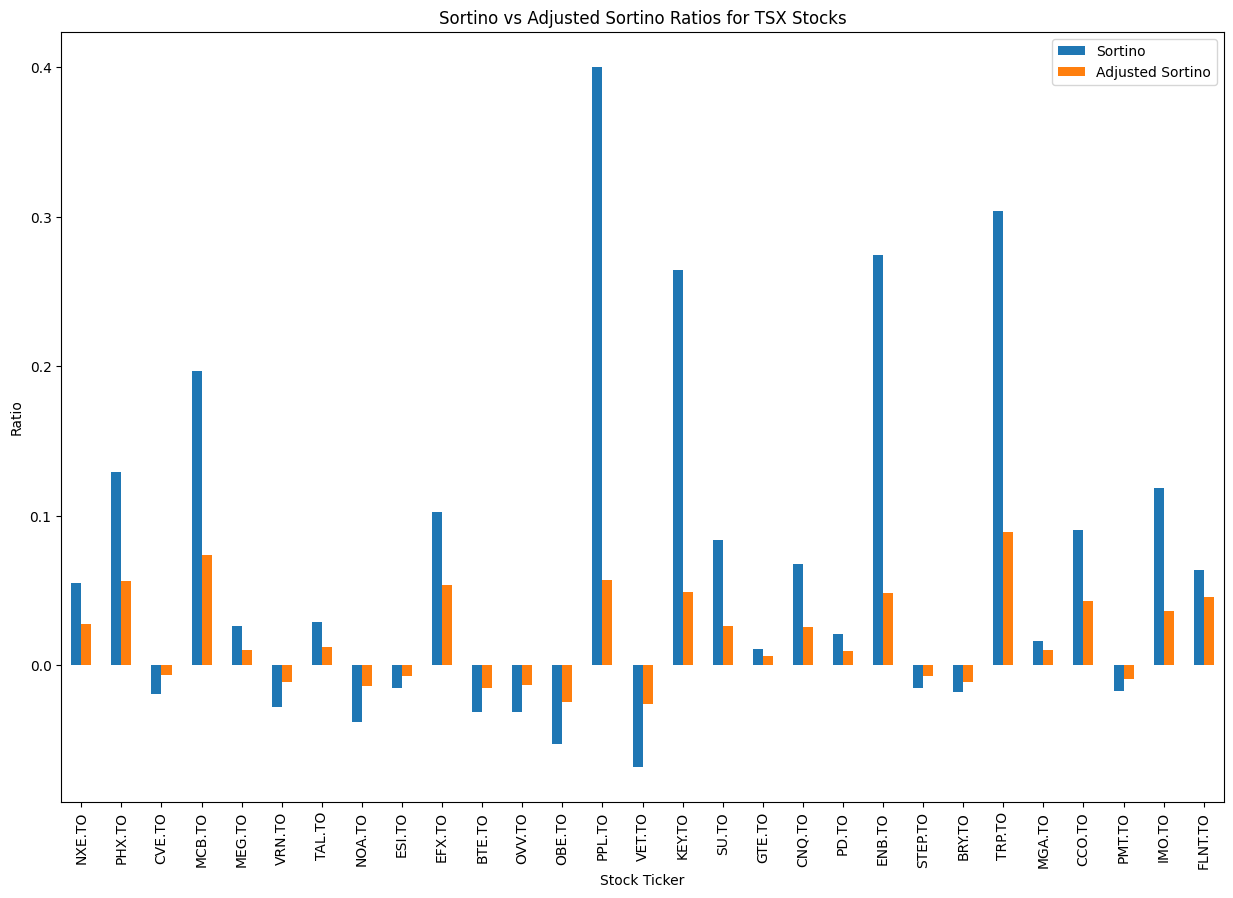

In [117]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of TSX tickers
tickers = ["NXE.TO", "PHX.TO", "CVE.TO", "MCB.TO", "MEG.TO", "VRN.TO", "TAL.TO", 
           "NOA.TO", "ESI.TO", "EFX.TO", "BTE.TO", "OVV.TO", "OBE.TO", "PPL.TO", 
           "VET.TO", "KEY.TO", "SU.TO", "GTE.TO", "CNQ.TO", "PD.TO", "ENB.TO", 
           "STEP.TO", "BRY.TO", "TRP.TO", "MGA.TO", "CCO.TO", "PMT.TO", "IMO.TO", 
           "FLNT.TO"]

# Function to calculate downside deviation
def downside_deviation(returns, target=0):
    downside = np.where(returns < target, returns - target, 0)  # Only look at negative deviations
    return np.sqrt(np.mean(downside**2))  # Downside deviation

# Function to calculate CVaR at multiple confidence levels
def calculate_cvar(returns, confidence_levels=[0.95, 0.99, 0.995]):
    cvars = {}
    for confidence in confidence_levels:
        var = np.percentile(returns, (1 - confidence) * 100)  # Value-at-Risk (VaR)
        cvar = returns[returns <= var].mean()  # CVaR is the mean of losses beyond the VaR
        cvars[f"CVaR_{int(confidence * 100)}%"] = cvar
    return cvars

# Function to calculate the adjusted Sortino ratio
def adjusted_sortino_ratio(returns, implied_volatility, risk_free_rate=0, confidence_levels=[0.95, 0.99, 0.995]):
    # Historical downside deviation
    downside_dev = downside_deviation(returns)
    
    # Calculate CVaR at multiple levels
    cvars = calculate_cvar(returns, confidence_levels)
    
    # Sortino ratio without implied volatility
    mean_excess_return = np.mean(returns) - risk_free_rate
    sortino_ratio = mean_excess_return / downside_dev if downside_dev != 0 else np.nan
    
    # Adjusted Sortino ratio (considering implied volatility and CVaR)
    implied_risk_adjustment = implied_volatility / np.sqrt(252)  # Convert annualized implied vol to daily (252 trading days)
    
    # Combine Sortino with implied volatility and CVaR adjustments
    adjusted_sortino = (mean_excess_return / (downside_dev + implied_risk_adjustment))
    
    return {
        "Sortino": sortino_ratio,
        "Adjusted Sortino": adjusted_sortino,
        **cvars
    }

# Dictionary to hold adjusted Sortino ratio, CVaR, and returns for each ticker
results = {}

# Loop through tickers, get returns and calculate adjusted Sortino and CVaR
for ticker in tickers:
    print(f"Processing {ticker}...")
    
    # Download historical data from Yahoo Finance (adjusted close prices)
    stock_data = yf.download(ticker, period="1y", interval="1d")
    
    # Calculate daily returns
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()
    
    # Dummy implied volatility (for illustration purposes, replace with actual data if available)
    implied_volatility = np.random.uniform(0.2, 0.4)  # 20% to 40% as random implied volatility values
    
    # Calculate the adjusted Sortino ratio
    result = adjusted_sortino_ratio(stock_data['Returns'].dropna(), implied_volatility)
    
    # Add mean returns to the result
    result["Mean_Returns"] = stock_data['Returns'].mean()
    
    # Store the result in the dictionary
    results[ticker] = result

# Convert the results into a DataFrame for easy viewing
df_results = pd.DataFrame(results).T  # Transpose to get tickers as rows
print(df_results)

# Visualizing the results
fig, ax = plt.subplots(figsize=(15,10))
df_results[['Sortino', 'Adjusted Sortino']].plot(kind='bar', ax=ax)
plt.title('Sortino vs Adjusted Sortino Ratios for TSX Stocks')
plt.xlabel('Stock Ticker')
plt.ylabel('Ratio')
plt.show()

# Optionally save the results to a CSV file
df_results.to_csv("adjusted_sortino_results.csv", index=True)


In [116]:
import yfinance as yf
import numpy as np
import pandas as pd

# List of stock symbols
# List of stock symbols adjusted for TSX
symbols = ["NXE.TO", "PHX.TO", "CVE.TO", "MCB.TO", "MEG.TO", "VRN.TO", "TAL.TO", "NOA.TO", "ESI.TO", "EFX.TO", 
           "BTE.TO", "OVV.TO", "OBE.TO", "PPL.TO", "VET.TO", "KEY.TO", "SU.TO", "GTE.TO", "CNQ.TO", "PD.TO", 
           "ENB.TO", "STEP.TO", "BRY.TO", "TRP.TO", "MGA.TO", "CCO.TO", "PMT.TO", "IMO.TO", "FLNT.TO"]


# Set the start and end date for fetching historical data
start_date = "2024-06-30"
end_date = "2024-10-08"

# Define a function to calculate daily returns
def calculate_daily_returns(prices):
    return prices.pct_change().dropna()

# Define a function to calculate Sortino Ratio
def calculate_sortino_ratio(returns, mar=0):
    # Calculate downside deviation (only returns below the MAR)
    downside_returns = returns[returns < mar]
    downside_deviation = np.sqrt(np.mean(downside_returns**2))  # Downside deviation is the standard deviation of negative returns
    
    # Calculate average return and annualize it
    average_return = returns.mean() * 252  # Assuming 252 trading days in a year
    
    # Annualize the downside deviation
    annualized_downside_deviation = downside_deviation * np.sqrt(252)
    
    # Calculate Sortino Ratio
    sortino_ratio = average_return / annualized_downside_deviation
    return sortino_ratio

# Dictionary to store Sortino Ratios for each stock
sortino_ratios = {}

# Fetch the data and calculate Sortino Ratio for each stock
for symbol in symbols:
    # Download the historical stock price data
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    
    # Calculate daily returns
    daily_returns = calculate_daily_returns(stock_data['Adj Close'])
    
    # Calculate Sortino Ratio
    sortino_ratio = calculate_sortino_ratio(daily_returns)
    
    # Store the Sortino Ratio in the dictionary
    sortino_ratios[symbol] = sortino_ratio

# Convert the dictionary to a DataFrame and display the results
sortino_df = pd.DataFrame(list(sortino_ratios.items()), columns=['Symbol', 'Sortino Ratio'])

# Display the results sorted by Sortino Ratio in descending order
sortino_df_sorted = sortino_df.sort_values(by="Sortino Ratio", ascending=False)
sortino_df_sorted


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Symbol,Sortino Ratio
23,TRP.TO,6.854669
20,ENB.TO,6.124826
13,PPL.TO,5.392350
15,KEY.TO,4.437579
3,MCB.TO,3.860722
27,IMO.TO,2.293312
9,EFX.TO,2.198668
8,ESI.TO,1.470215
1,PHX.TO,1.281171
16,SU.TO,0.747752


In [ ]:
median_price = final_df.sort_values(by = "percent_median_price",ascending = False)
median_price.head(4)

,symbol,current_stock_price,high_target_price,median_target_price,low_target_price,percent_high_price,percent_median_price,percent_low_price,last_updated_x,num_of_analysts,num_of_buys,percent_buys,num_of_holds,percent_holds,num_of_sells,percent_sells,last_updated_y
13,MEG,21.13,54.000000,50.000000,43.000000,155.560814,136.630383,103.502130,2024-08-15T08:20:49.494493+00:00,7,7,100.0000,0,0.0000,0,0.0,2024-10-07T08:03:07.437114+00:00
9,GTE,6.67,14.055500,10.997174,6.996870,110.727136,64.875172,4.900600,2024-10-07T08:21:48.873068+00:00,4,2,50.0000,2,50.0000,0,0.0,2024-10-07T08:08:55.454779+00:00
27,VRN,6.69,14.038199,10.838150,8.100446,109.838550,62.005232,21.082900,2024-10-05T08:06:03.983005+00:00,13,12,92.3077,1,7.6923,0,0.0,2024-10-07T08:07:48.179712+00:00
17,OBE,6.36,12.608002,9.574664,7.402198,98.239025,50.545031,16.386761,2024-10-07T08:22:04.628431+00:00,3,2,66.6667,1,33.3333,0,0.0,2024-10-07T08:03:17.788270+00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

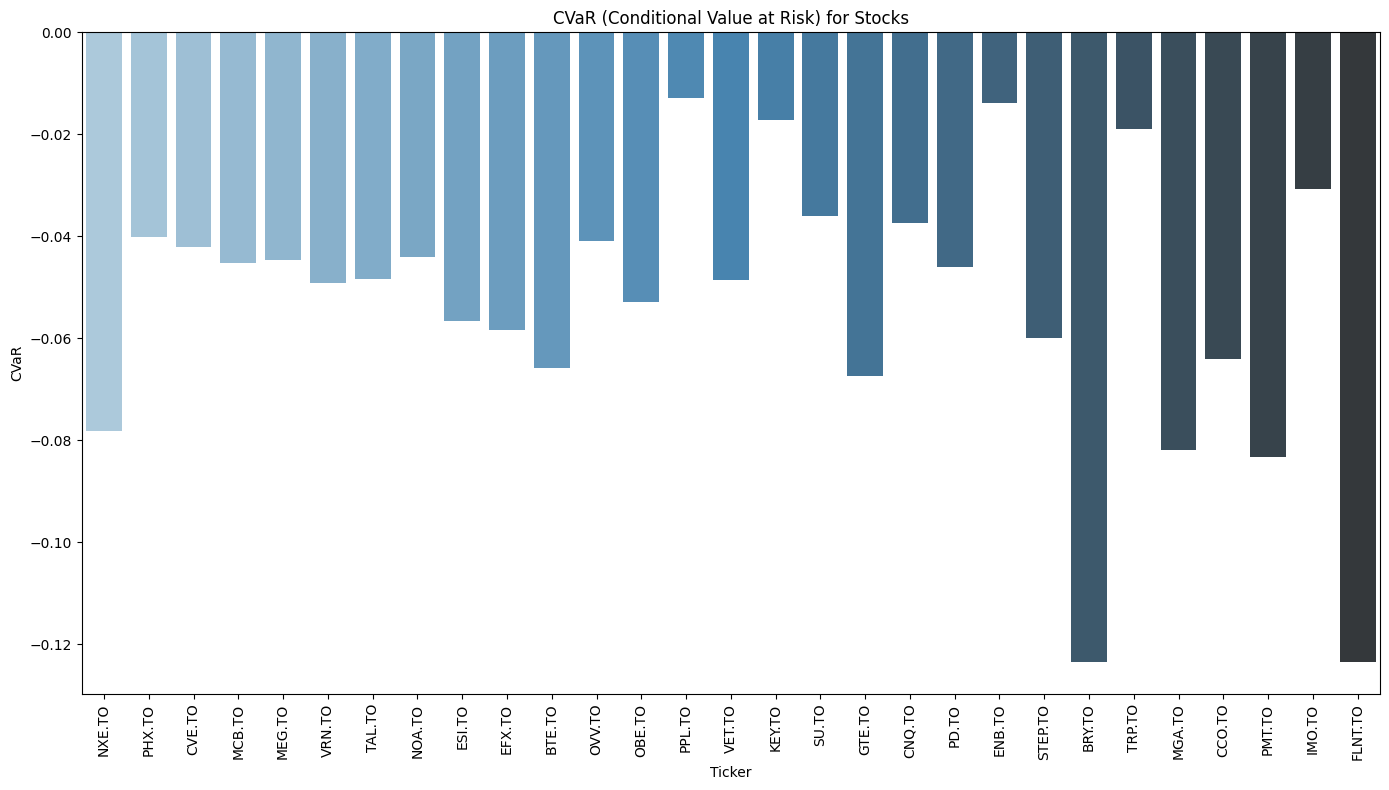

In [118]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# List of stock symbols
symbols = ["NXE.TO", "PHX.TO", "CVE.TO", "MCB.TO", "MEG.TO", "VRN.TO", "TAL.TO", 
           "NOA.TO", "ESI.TO", "EFX.TO", "BTE.TO", "OVV.TO", "OBE.TO", "PPL.TO", 
           "VET.TO", "KEY.TO", "SU.TO", "GTE.TO", "CNQ.TO", "PD.TO", "ENB.TO", 
           "STEP.TO", "BRY.TO", "TRP.TO", "MGA.TO", "CCO.TO", "PMT.TO", "IMO.TO", "FLNT.TO"]

# Fetch stock data from Yahoo Finance for the past year
def fetch_stock_data(ticker):
    stock_data = yf.download(ticker, period="1y", interval="1d")
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()
    return stock_data

# Calculate CVaR (Conditional Value at Risk)
def calculate_cvar(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns.dropna())
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var_value = sorted_returns[var_index]
    cvar = sorted_returns[:var_index].mean() if var_index > 0 else np.nan
    return cvar

# Fetch data and calculate CVaR for each stock
cvar_data = {}

for ticker in symbols:
    stock_data = fetch_stock_data(ticker)
    returns = stock_data['Returns']
    cvar_value = calculate_cvar(returns)
    cvar_data[ticker] = cvar_value

# Convert CVaR data to DataFrame for plotting
df_cvar = pd.DataFrame(list(cvar_data.items()), columns=['Ticker', 'CVaR'])

# Plot CVaR values
plt.figure(figsize=(14, 8))
sns.barplot(x='Ticker', y='CVaR', data=df_cvar, palette="Blues_d")
plt.title('CVaR (Conditional Value at Risk) for Stocks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [119]:
import requests
import json
import pandas as pd

# List of tickers
tickers = ["AR", "CWEGF", "NFG", "RRC", "SWN", "CHK", "CNX", "EQT"]

# Base URL (without the ticker part)
base_url = "https://query1.finance.yahoo.com/ws/fundamentals-timeseries/v1/finance/timeseries/{}?lang=en-US&region=US&padTimeSeries=true&type=earningsReleaseEvents%2CanalystRatings%2CeconomicEvents&period1=1671512400&period2=1728601200"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Function to fetch JSON data for a given ticker
def fetch_data(ticker):
    url = base_url.format(ticker)
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        return response.json()  # Return the JSON data
    else:
        print(f"Failed to fetch data for {ticker}")
        return None

# Function to parse and extract relevant data
def parse_json_data(data):
    if data and 'timeseries' in data and 'result' in data['timeseries']:
        return data['timeseries']['result']  # Extract the 'result' part from the JSON
    else:
        return None

# Main function to fetch and parse data for all tickers
def fetch_and_parse_data(tickers):
    all_data = []
    
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        json_data = fetch_data(ticker)  # Fetch JSON for ticker
        parsed_data = parse_json_data(json_data)  # Parse relevant part
        
        if parsed_data:
            all_data.append({ticker: parsed_data})  # Append parsed data for each ticker
    
    return all_data

# Run the script and fetch the data
if __name__ == "__main__":
    data = fetch_and_parse_data(tickers)
    
    # Print or process the data
    for entry in data:
        print(json.dumps(entry, indent=4))  # Nicely format the JSON output


Fetching data for AR...
Fetching data for CWEGF...
Fetching data for NFG...
Fetching data for RRC...
Fetching data for SWN...
Fetching data for CHK...
Fetching data for CNX...
Fetching data for EQT...
{
    "AR": [
        {
            "meta": {
                "symbol": [
                    "AR"
                ],
                "type": [
                    "analystRatings"
                ]
            },
            "timestamp": [
                1674565886,
                1674641615,
                1674650149,
                1674738760,
                1675685925,
                1676290711,
                1676639178,
                1678471247,
                1679484296,
                1679659828,
                1679919426,
                1680264400,
                1681207911,
                1681219990,
                1682079887,
                1682608611,
                1682946393,
                1684151394,
                1684493888,
                1687859030

In [120]:
import json
import pandas as pd

# Function to parse the JSON data and extract analyst ratings
def parse_analyst_ratings(json_data):
    analyst_data = []
    
    # Iterate over the timeseries result list
    for result in json_data['timeseries']['result']:
        if result['meta']['type'][0] == 'analystRatings':  # We only want analyst ratings data
            symbol = result['meta']['symbol'][0]  # Extract the symbol for each entry
            
            for rating in result['analystRatings']:
                # Append the relevant information into the analyst_data list
                analyst_data.append({
                    'symbol': symbol,
                    'analyst': rating.get('analyst', None),
                    'currentRating': rating.get('currentRating', None),
                    'ratingAction': rating.get('ratingAction', None),
                    'priorPriceTarget': rating.get('priorPriceTarget', None),
                    'currentPriceTarget': rating.get('currentPriceTarget', None),
                    'priceTargetAction': rating.get('priceTargetAction', None),
                    'epochDateInMillis': rating.get('epochDateInMillis', None),
                    'timeZoneShortName': rating.get('timeZoneShortName', None)
                })
    
    # Convert the analyst_data list to a DataFrame
    df_analyst_ratings = pd.DataFrame(analyst_data)
    
    # Convert the epochDateInMillis to a readable date format if needed
    df_analyst_ratings['date'] = pd.to_datetime(df_analyst_ratings['epochDateInMillis'], unit='ms')
    
    return df_analyst_ratings

# Sample usage
# Replace 'json_data' with the actual JSON object you have
df_analyst_ratings = parse_analyst_ratings(json_data)

# Display the DataFrame
print(df_analyst_ratings)


[{'AR': [{'meta': {'symbol': ['AR'], 'type': ['analystRatings']},
    'timestamp': [1674565886,
     1674641615,
     1674650149,
     1674738760,
     1675685925,
     1676290711,
     1676639178,
     1678471247,
     1679484296,
     1679659828,
     1679919426,
     1680264400,
     1681207911,
     1681219990,
     1682079887,
     1682608611,
     1682946393,
     1684151394,
     1684493888,
     1687859030,
     1688645737,
     1689337726,
     1689687415,
     1690467807,
     1690557986,
     1692184191,
     1692793364,
     1693573572,
     1694441621,
     1695045485,
     1696254514,
     1696345285,
     1697811664,
     1698154784,
     1698335548,
     1701688514,
     1702561837,
     1704187806,
     1704289945,
     1704990826,
     1706125327,
     1708091774,
     1708539827,
     1710502216,
     1710927743,
     1711553137,
     1711651520,
     1712146152,
     1712338330,
     1712755195,
     1712865321,
     1713197288,
     1713351307,
     1714488368,
   

In [122]:
import requests
import pandas as pd
import json

# List of tickers
tickers = ["AR", "CWEGF", "NFG", "RRC", "SWN", "CHK", "CNX", "EQT"]

# Base URL (without the ticker part)
base_url = "https://query1.finance.yahoo.com/ws/fundamentals-timeseries/v1/finance/timeseries/{}?lang=en-US&region=US&padTimeSeries=true&type=earningsReleaseEvents%2CanalystRatings%2CeconomicEvents&period1=1671512400&period2=1728601200"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Function to fetch JSON data for a given ticker
def fetch_data(ticker):
    url = base_url.format(ticker)
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        return response.json()  # Return the JSON data
    else:
        print(f"Failed to fetch data for {ticker}")
        return None

# Function to parse the JSON data and extract analyst ratings
def parse_analyst_ratings(json_data):
    analyst_data = []
    
    # Iterate over the timeseries result list
    for result in json_data['timeseries']['result']:
        if result['meta']['type'][0] == 'analystRatings':  # We only want analyst ratings data
            symbol = result['meta']['symbol'][0]  # Extract the symbol for each entry
            
            # Check if 'analystRatings' key exists in the result
            if 'analystRatings' in result:
                for rating in result['analystRatings']:
                    # Append the relevant information into the analyst_data list
                    analyst_data.append({
                        'symbol': symbol,
                        'analyst': rating.get('analyst', None),
                        'currentRating': rating.get('currentRating', None),
                        'ratingAction': rating.get('ratingAction', None),
                        'priorPriceTarget': rating.get('priorPriceTarget', None),
                        'currentPriceTarget': rating.get('currentPriceTarget', None),
                        'priceTargetAction': rating.get('priceTargetAction', None),
                        'epochDateInMillis': rating.get('epochDateInMillis', None),
                        'timeZoneShortName': rating.get('timeZoneShortName', None)
                    })
    
    # Convert the analyst_data list to a DataFrame
    df_analyst_ratings = pd.DataFrame(analyst_data)
    
    # Convert the epochDateInMillis to a readable date format if needed
    if not df_analyst_ratings.empty:
        df_analyst_ratings['date'] = pd.to_datetime(df_analyst_ratings['epochDateInMillis'], unit='ms')
    
    return df_analyst_ratings

# Main function to fetch and parse data for all tickers
def fetch_and_parse_data(tickers):
    all_analyst_data = []  # List to hold all parsed DataFrames
    
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        json_data = fetch_data(ticker)  # Fetch JSON for ticker
        if json_data:
            df_analyst_ratings = parse_analyst_ratings(json_data)  # Parse relevant part
            
            if not df_analyst_ratings.empty:
                all_analyst_data.append(df_analyst_ratings)  # Append parsed data for each ticker
    
    # Concatenate all DataFrames into one large DataFrame
    if all_analyst_data:
        final_df = pd.concat(all_analyst_data, ignore_index=True)
        return final_df
    else:
        print("No data found.")
        return None

# Run the script and fetch the data
if __name__ == "__main__":
    df_analyst_ratings = fetch_and_parse_data(tickers)
    
    if df_analyst_ratings is not None:
        print(df_analyst_ratings)


Fetching data for AR...
Fetching data for CWEGF...
Fetching data for NFG...
Fetching data for RRC...
Fetching data for SWN...
Fetching data for CHK...
Fetching data for CNX...
Fetching data for EQT...
    symbol         analyst   currentRating ratingAction  priorPriceTarget  \
0       AR  Morgan Stanley    Equal-Weight    Maintains              34.0   
1       AR     Wells Fargo      Overweight    Initiated               NaN   
2       AR   Goldman Sachs             Buy    Maintains              45.0   
3       AR   Raymond James      Strong Buy    Maintains              55.0   
4       AR   Raymond James  Market Perform   Downgrades               NaN   
..     ...             ...             ...          ...               ...   
412    EQT             UBS         Neutral    Maintains              38.0   
413    EQT       JP Morgan      Overweight    Maintains              37.0   
414    EQT       Citigroup             Buy     Upgrades              37.0   
415    EQT          Mizuho   

In [ ]:
df_analyst_ratings.drop(columns = ["epochDateInMillis","timeZoneShortName"],inplace = True)


In [152]:
df_analyst_ratings["analyst"].value_counts()

Mizuho               55
Truist Securities    47
Wells Fargo          39
Piper Sandler        29
Morgan Stanley       28
Benchmark            25
Scotiabank           21
Susquehanna          17
RBC Capital          17
Stephens & Co.       16
UBS                  16
Citigroup            15
Goldman Sachs        15
JP Morgan            15
Stifel               12
Raymond James        12
Jefferies             8
BMO Capital           7
Barclays              5
Wolfe Research        3
Bernstein             3
Roth MKM              2
Tudor Pickering       2
Keybanc               2
B of A Securities     2
Argus Research        1
Seibert Williams      1
Seaport Global        1
Credit Suisse         1
Name: analyst, dtype: int64

In [155]:
cameron = df_analyst_ratings.loc[df_analyst_ratings["analyst"] == "Scotiabank"]
morgan = df_analyst_ratings.loc[df_analyst_ratings["analyst"] == "Morgan Stanley"]

In [147]:
import plotly.graph_objects as go
import yfinance as yf

# Mapping function for ratings
def map_rating(rating):
    if rating == "Sector Perform":
        return "Hold"
    elif rating == "Sector Outperform":
        return "Buy"
    elif rating == "Sector Underperform":
        return "Sell"
    else:
        return rating

# Function to plot price history and analyst recommendations for a given symbol
def interactive_plot(symbol, df_ratings):
    # Fetch historical data
    stock_data = yf.download(symbol, start="2023-01-01", end="2024-12-31")
    
    # Create a line chart for stock price
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Adj Close'], mode='lines', name='Stock Price'))

    # Filter data for the symbol and apply rating mapping
    symbol_ratings = df_ratings[df_ratings['symbol'] == symbol].copy()
    symbol_ratings['currentRatingMapped'] = symbol_ratings['currentRating'].apply(map_rating)

    # Split data for Buy, Hold, and Sell to show in the legend
    buy_ratings = symbol_ratings[symbol_ratings['currentRatingMapped'] == 'Buy']
    hold_ratings = symbol_ratings[symbol_ratings['currentRatingMapped'] == 'Hold']
    sell_ratings = symbol_ratings[symbol_ratings['currentRatingMapped'] == 'Sell']

    # Plot Buy ratings
    if not buy_ratings.empty:
        fig.add_trace(go.Scatter(
            x=buy_ratings['date'], 
            y=buy_ratings['currentPriceTarget'],
            mode='markers',
            marker=dict(color='green', size=10),
            text=buy_ratings.apply(lambda row: f"{row['ratingAction']} (Buy)<br>Target: {row['currentPriceTarget']}", axis=1),
            hoverinfo='text',
            name='Buy'
        ))

    # Plot Hold ratings
    if not hold_ratings.empty:
        fig.add_trace(go.Scatter(
            x=hold_ratings['date'], 
            y=hold_ratings['currentPriceTarget'],
            mode='markers',
            marker=dict(color='orange', size=10),
            text=hold_ratings.apply(lambda row: f"{row['ratingAction']} (Hold)<br>Target: {row['currentPriceTarget']}", axis=1),
            hoverinfo='text',
            name='Hold'
        ))

    # Plot Sell ratings
    if not sell_ratings.empty:
        fig.add_trace(go.Scatter(
            x=sell_ratings['date'], 
            y=sell_ratings['currentPriceTarget'],
            mode='markers',
            marker=dict(color='red', size=10),
            text=sell_ratings.apply(lambda row: f"{row['ratingAction']} (Sell)<br>Target: {row['currentPriceTarget']}", axis=1),
            hoverinfo='text',
            name='Sell'
        ))

    # Customize layout
    fig.update_layout(title=f'{symbol} Price History and Analyst Ratings',
                      xaxis_title='Date', yaxis_title='Price (USD)', hovermode='x')
    return fig

# Iterate over all unique symbols and plot their interactive chart
for symbol in cameron['symbol'].unique():
    fig = interactive_plot(symbol, cameron)
    fig.show()  # Show the interactive plot for each symbol


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


In [160]:
import plotly.graph_objects as go
import yfinance as yf

# Mapping function for Morgan Stanley's ratings
def map_rating(rating):
    if rating == "Equal-Weight":
        return "Hold"
    elif rating == "Overweight":
        return "Buy"
    elif rating == "Underweight":
        return "Sell"
    else:
        return rating

# Function to plot price history and analyst recommendations for a given symbol
def interactive_plot(symbol, df_ratings):
    # Fetch historical data
    stock_data = yf.download(symbol, start="2023-01-01", end="2024-12-31")
    
    # Create a line chart for stock price
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Adj Close'], mode='lines', name='Stock Price'))

    # Filter data for the symbol and apply rating mapping
    symbol_ratings = df_ratings[df_ratings['symbol'] == symbol].copy()
    symbol_ratings['currentRatingMapped'] = symbol_ratings['currentRating'].apply(map_rating)

    # Split data for Buy, Hold, and Sell to show in the legend
    buy_ratings = symbol_ratings[symbol_ratings['currentRatingMapped'] == 'Buy']
    hold_ratings = symbol_ratings[symbol_ratings['currentRatingMapped'] == 'Hold']
    sell_ratings = symbol_ratings[symbol_ratings['currentRatingMapped'] == 'Sell']

    # Plot Buy ratings
    if not buy_ratings.empty:
        fig.add_trace(go.Scatter(
            x=buy_ratings['date'], 
            y=buy_ratings['currentPriceTarget'],
            mode='markers',
            marker=dict(color='green', size=10),
            text=buy_ratings.apply(lambda row: f"{row['ratingAction']} (Buy)<br>Target: {row['currentPriceTarget']}", axis=1),
            hoverinfo='text',
            name='Buy'
        ))

    # Plot Hold ratings
    if not hold_ratings.empty:
        fig.add_trace(go.Scatter(
            x=hold_ratings['date'], 
            y=hold_ratings['currentPriceTarget'],
            mode='markers',
            marker=dict(color='orange', size=10),
            text=hold_ratings.apply(lambda row: f"{row['ratingAction']} (Hold)<br>Target: {row['currentPriceTarget']}", axis=1),
            hoverinfo='text',
            name='Hold'
        ))

    # Plot Sell ratings
    if not sell_ratings.empty:
        fig.add_trace(go.Scatter(
            x=sell_ratings['date'], 
            y=sell_ratings['currentPriceTarget'],
            mode='markers',
            marker=dict(color='red', size=10),
            text=sell_ratings.apply(lambda row: f"{row['ratingAction']} (Sell)<br>Target: {row['currentPriceTarget']}", axis=1),
            hoverinfo='text',
            name='Sell'
        ))

    # Customize layout
    fig.update_layout(title=f'{symbol} Price History and Analyst Ratings',
                      xaxis_title='Date', yaxis_title='Price (USD)', hovermode='x')
    return fig

# Iterate over all unique symbols and plot their interactive chart
for symbol in morgan['symbol'].unique():
    fig = interactive_plot(symbol, morgan)
    fig.show()  # Show the interactive plot for each symbol


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


In [ ]:
# import requests
# import pandas as pd

# # URL Endpoints
# analyst_url = "https://production.dataviz.cnn.io/quote/analystratings/SU"
# forecast_url = "https://production.dataviz.cnn.io/quote/forecast/SU"
# financials_url = "https://production.dataviz.cnn.io/quote/financials/SU/4"
# profile_url = "https://production.dataviz.cnn.io/quote/profile/SU"

# # Headers to mimic a browser request
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
# }

# # Function to scrape forecast data
# def get_forecast_data():
#     response = requests.get(forecast_url, headers=headers)
#     if response.status_code == 200:
#         return pd.DataFrame(response.json())  # Return DataFrame directly
#     return None

# def get_analyst_data():
#     response = requests.get(analyst_url, headers=headers)
#     if response.status_code == 200:
#         return pd.DataFrame(response.json())  # Return DataFrame directly
#     return None

# # Function to scrape financials data
# def get_financials_data():
#     response = requests.get(financials_url, headers=headers)
#     if response.status_code == 200:
#         data = response.json() 
#         return  pd.json_normalize(data,sep = "_") # Return DataFrame directly
#     return None

# # Function to scrape profile data
# def get_profile_data():
#     response = requests.get(profile_url, headers=headers)
#     if response.status_code == 200:
#         return pd.DataFrame([response.json()])  # Return DataFrame directly
#     return None

# # Main function to get the DataFrames
# def get_data():
#     df_forecast = get_forecast_data()
#     df_financials = get_financials_data()
#     df_profile = get_profile_data()
#     df_analyst = get_analyst_data()
    
#     return df_analyst,df_forecast, df_financials, df_profile  # Return all three DataFrames

# Call the function to get the DataFrames
# df_analyst,df_forecast, df_financials, df_profile = get_data()

In [ ]:
# df_profile = pd.json_normalize(df_profile[0]).T
# df_profile.reset_index(inplace = True)
# df_profile.columns = ["variable","value"]